# Titanic: EDA

# Dataset statistics

# Loading the Data

In [2]:
#Let's import pandas to read the csv file.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Let's print 1st 5 data item 
df = pd.read_csv('titanic.csv')
(df.head())
#print(df.Survived.value_counts())

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
#Observing the lables of each column
print(df.keys())

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [8]:
print(df.describe())
df.dtypes

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
#finding null values,note we dont have any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


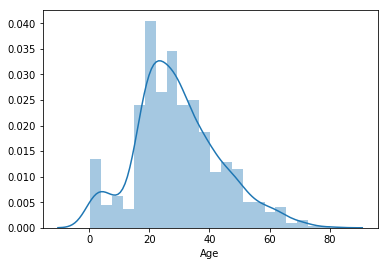

In [10]:
sns.distplot(df['Age'])

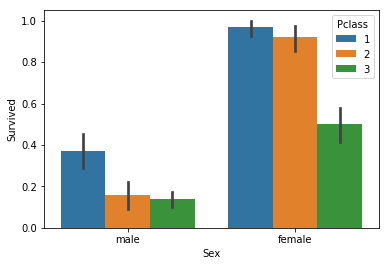

In [12]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)

C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


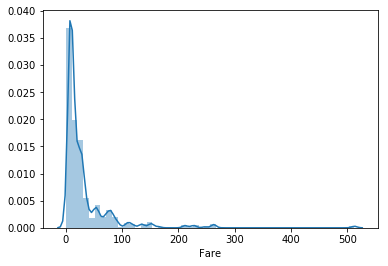

In [13]:
sns.distplot(df['Fare'])

C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


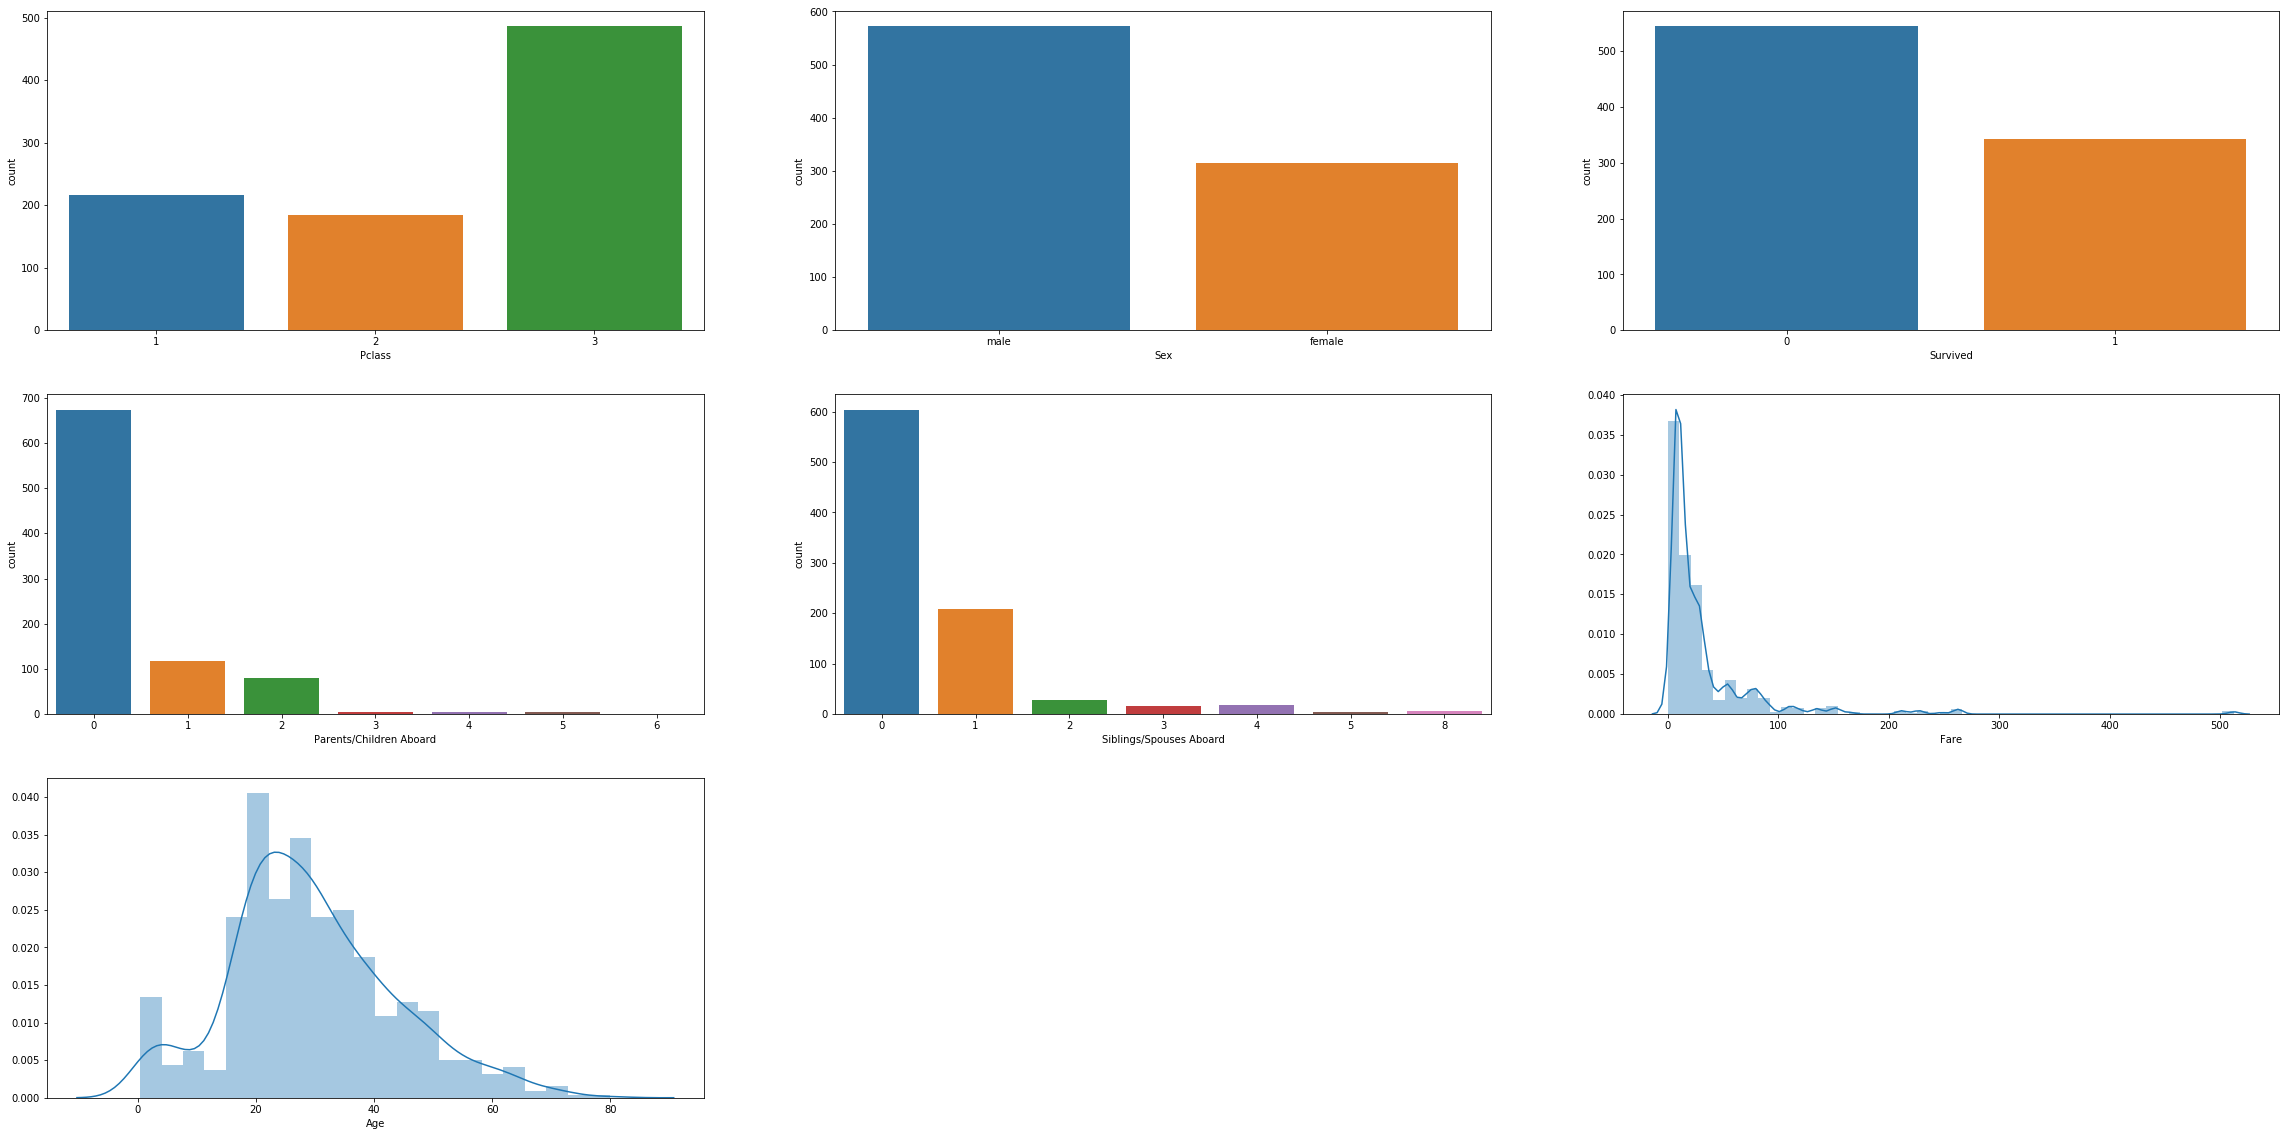

In [14]:
'''
categ =  [ 'Pclass', 'Sex', 'Survived', 'Parents/Children Aboard','Siblings/Spouses Aboard']
conti = ['Fare', 'Age']
(lambda y:sns.countplot(x=categ[y], data=df), categ)
plt.plot()

'''
#Distribution
categ =  [ 'Pclass', 'Sex', 'Survived', 'Parents/Children Aboard','Siblings/Spouses Aboard']
conti = ['Fare', 'Age']
fig = plt.figure(figsize=(40, 20))
for i in range (0,len(categ)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ[i], data=df);  

for col in conti:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(df[col].dropna());
    i += 1
plt.show()
fig.clear()

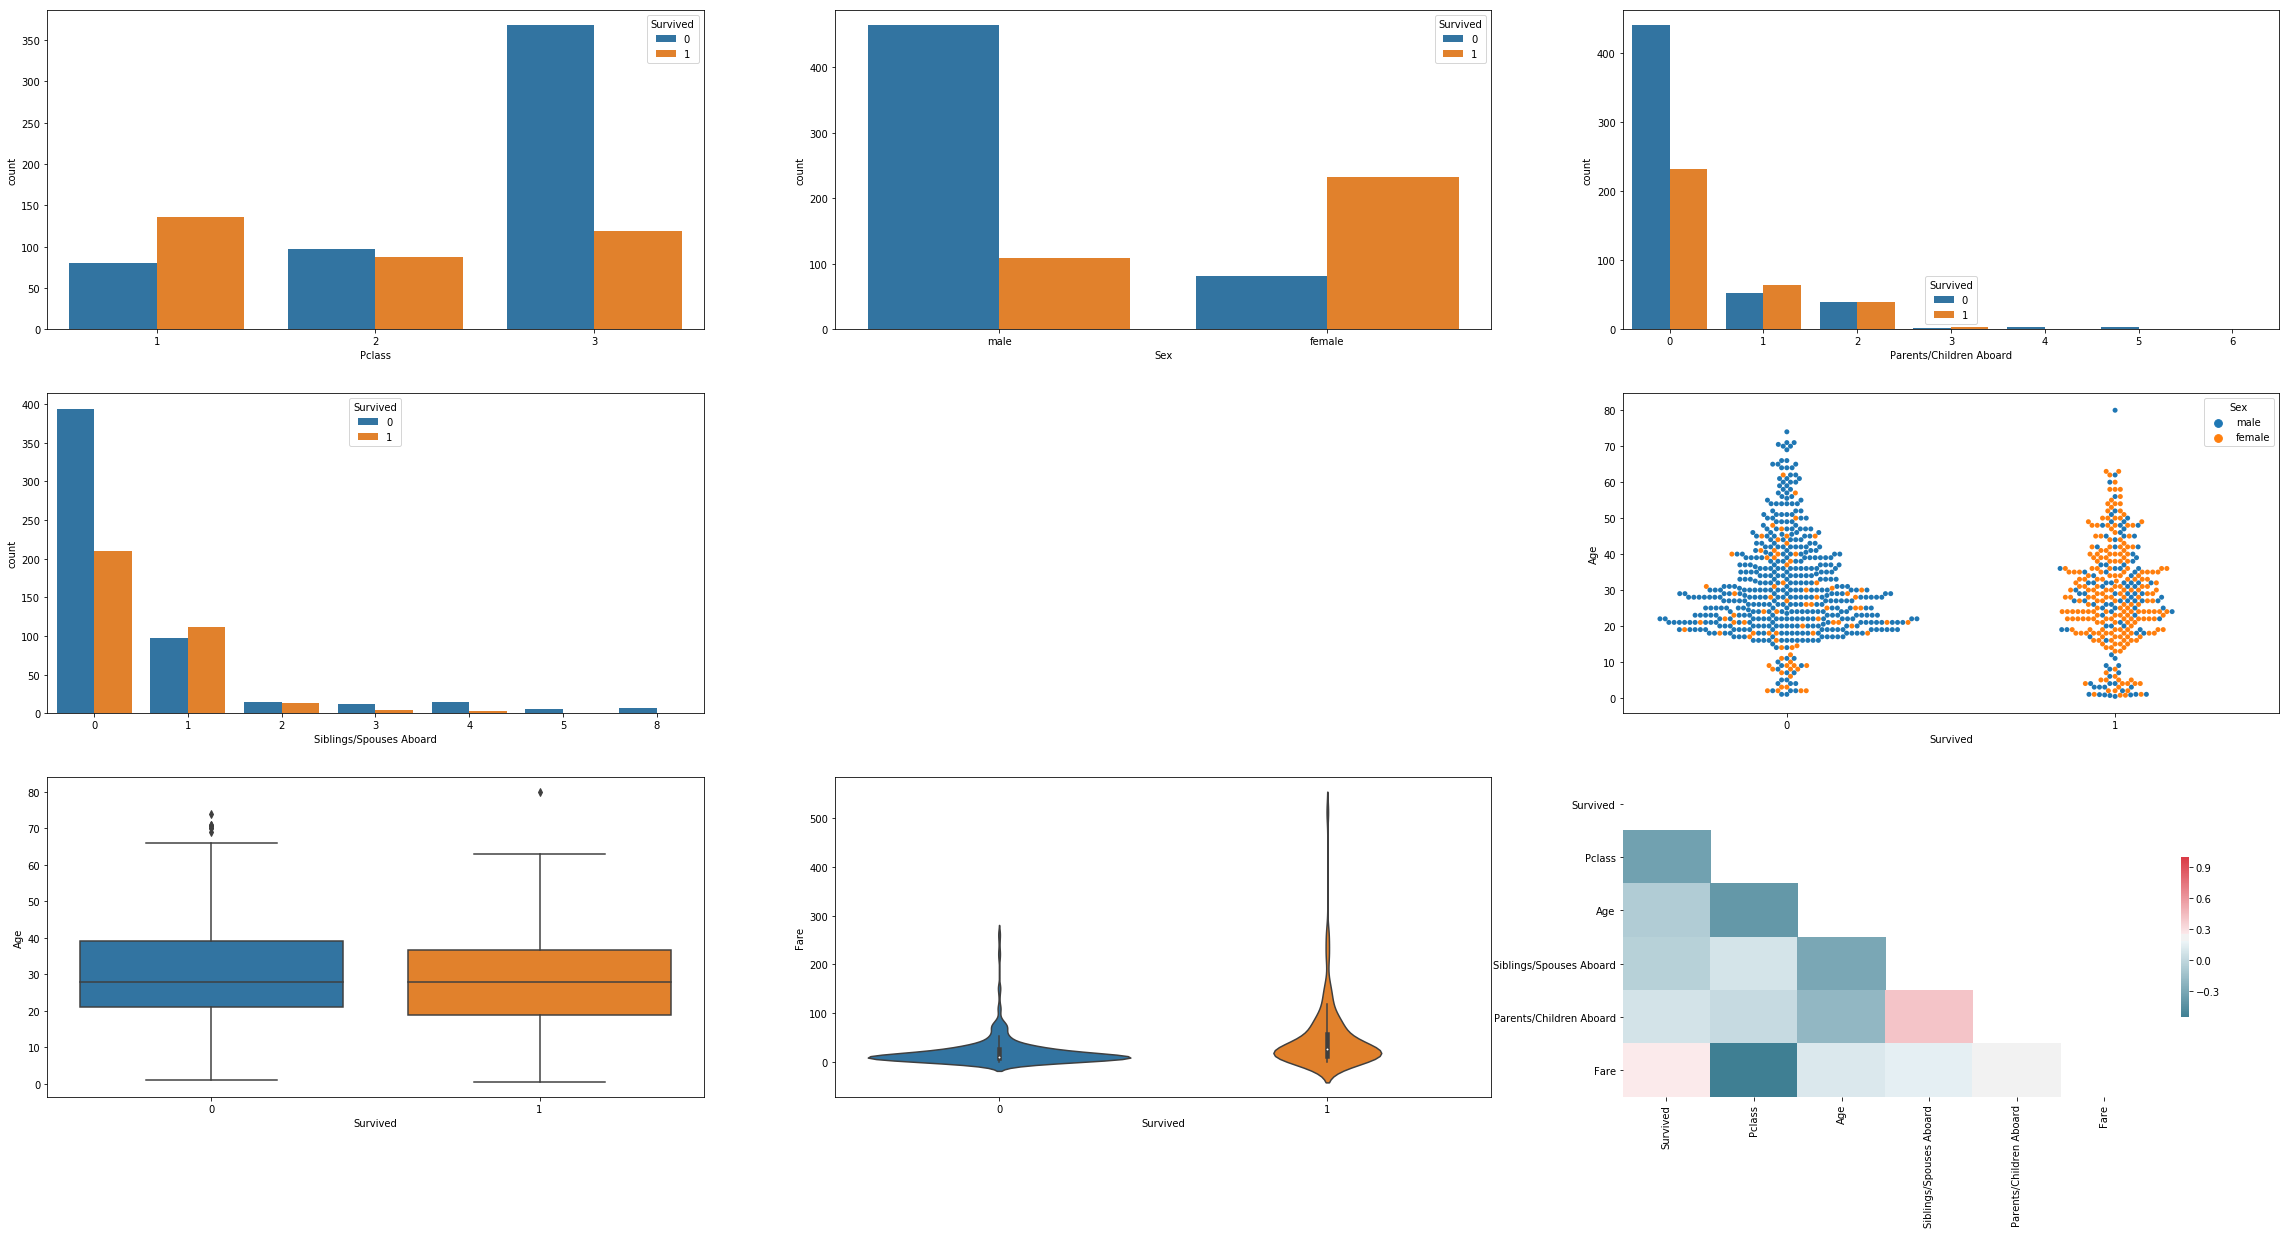

In [15]:
categ =  [ 'Pclass', 'Sex', 'Survived', 'Parents/Children Aboard','Siblings/Spouses Aboard']
conti = ['Fare', 'Age']
fig = plt.figure(figsize=(40, 20))
i = 1
for col in categ:
    if col != 'Survived':
        fig.add_subplot(3,3,i)
        sns.countplot(x=col, data=df,hue='Survived');
        i += 1

# Box plot survived x age
fig.add_subplot(3,3,6)
sns.swarmplot(x="Survived", y="Age", hue="Sex", data=df);
fig.add_subplot(3,3,7)
sns.boxplot(x="Survived", y="Age", data=df)

# fare and Survived
fig.add_subplot(3,3,8)
sns.violinplot(x="Survived", y="Fare", data=df)

# correlations with the new features
corr = df.drop(['Name'], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig.add_subplot(3,3,9)
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5})
plt.show()
fig.clear()

Text(0.5,1,'Count of Passengers who survived')

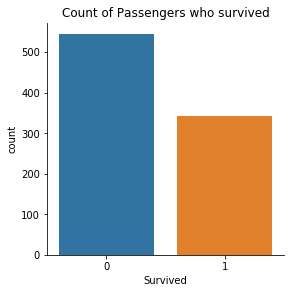

In [16]:
sns.factorplot('Survived', data=df, kind='count')
plt.title('Count of Passengers who survived')

C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Agewise distribution of the passenger aboard the Titanic')

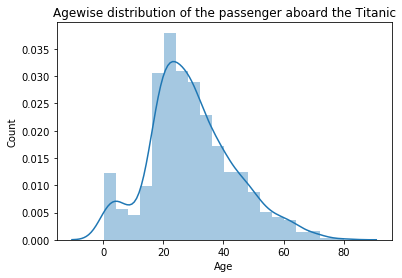

In [17]:
sns.distplot(df['Age'].dropna(), bins=20, kde=True)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')


We can see some outliers in above plot.
these can be most of the passengers were aged beyween 15-40 years but again its not that much informative 

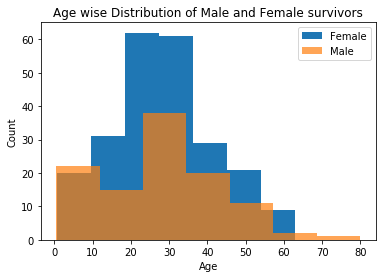

In [18]:
#Age wise Distribution of Male and Female survivors
plt.hist(df['Age'][(df['Sex'] == 'female') & (df['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(df['Age'][(df['Sex'] == 'male') & (df['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

From above visualization, it is evident that Women had better survival chance or we can say many of our young men died for their love or crush

I would also like to see the survival rate across all the class. we can do this by taking sum of survived passengers for each class and divide it by total number of passengers .I am using pandas groupby function to segregate passengers according to their class.

In [19]:
df.groupby(['Pclass'])['Survived'].sum()/df.groupby(['Pclass'])['Survived'].count()*100
# now visualizing below

Pclass
1    62.962963
2    47.282609
3    24.435318
Name: Survived, dtype: float64

Text(0.5,0.98,'Class wise segregation of passengers')

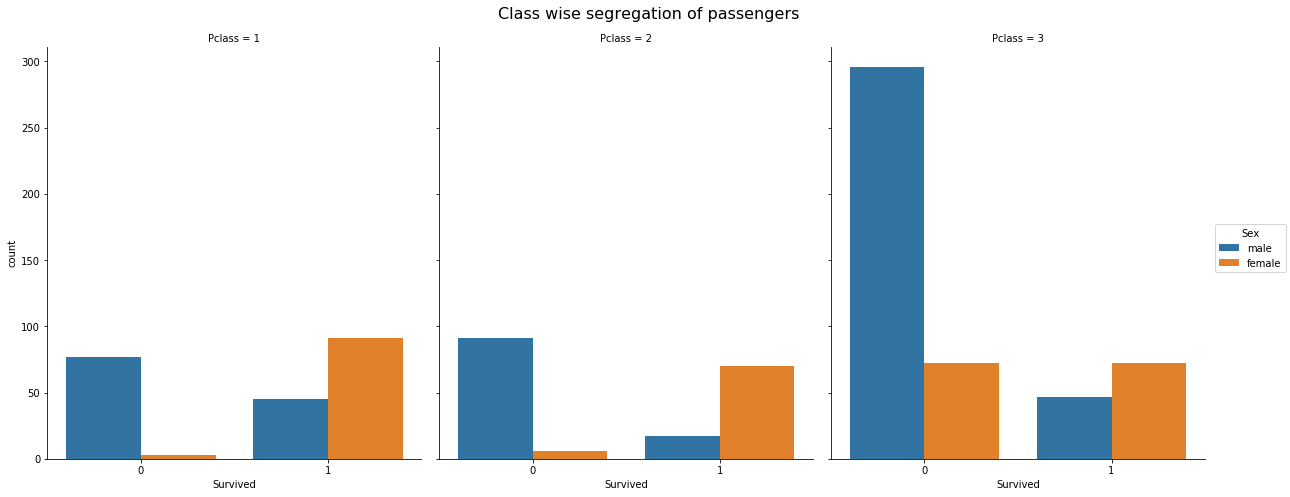

In [20]:
sns.factorplot('Survived', col='Pclass',hue='Sex', data=df, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)

# From above visualization we can see that class played important for Survival of Male and Female passengers.

In [21]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

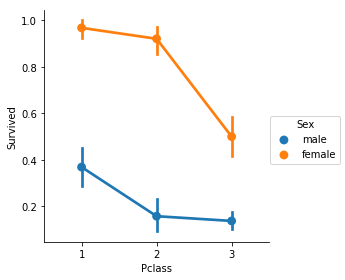

In [22]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.
Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.
It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.
Looks like Pclass is also an important feature

In [23]:
print('Oldest Passenger was of:',df['Age'].max(),'Year')
print('Youngest Passenger was of:',df['Age'].min(),'Year')
print('Average Age on the ship:',df['Age'].mean(),'Year')

Oldest Passenger was of: 80.0 Year
Youngest Passenger was of: 0.42 Year
Average Age on the ship: 29.471443066516347 Year


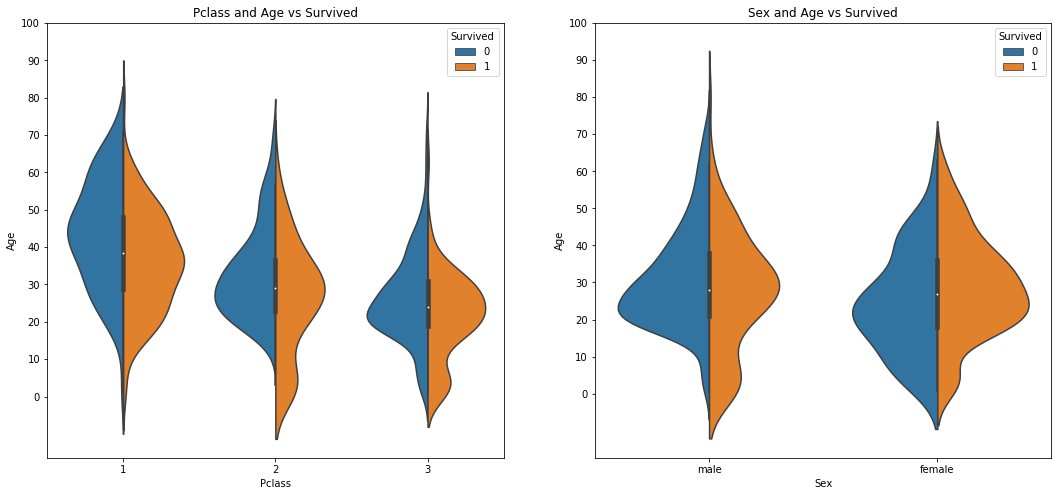

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

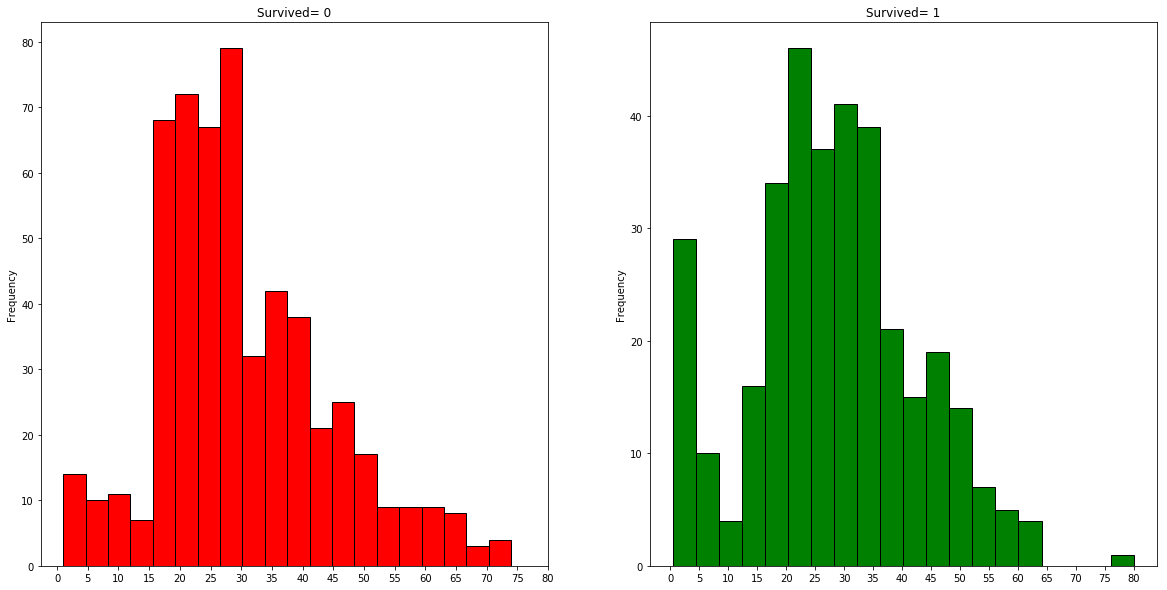

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Observations:

In [26]:
print('Highest Fare was:',df['Fare'].max())
print('Lowest Fare was:',df['Fare'].min())
print('Average Fare was:',df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.30542018038328


The lowest fare is 0.0. that means its a free luxorious ride!

C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rajat Goyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


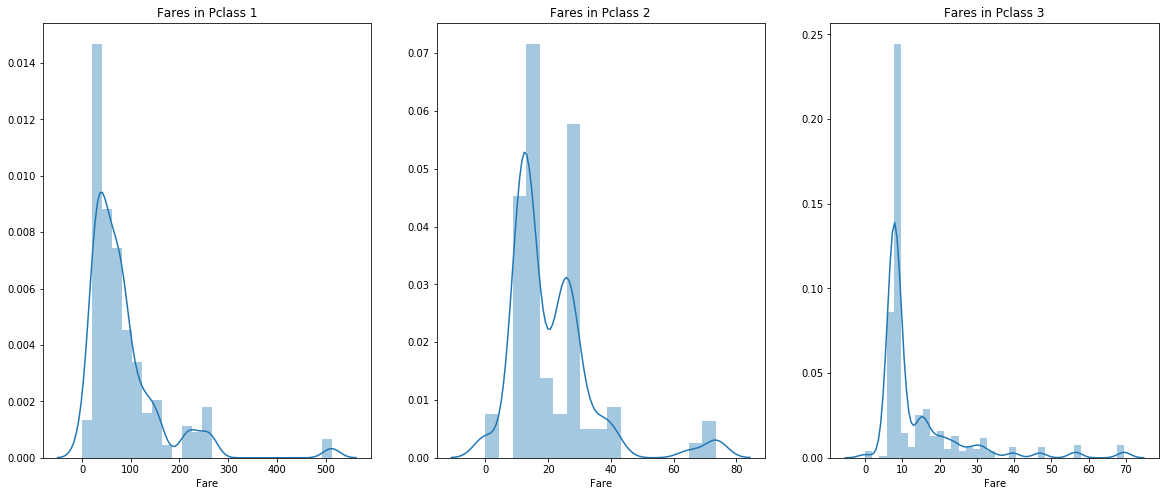

In [27]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()


There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

# Multivariate Analysis

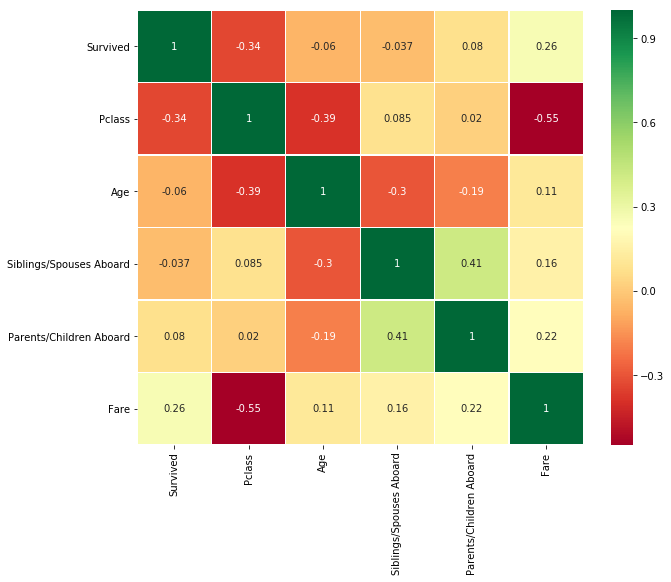

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Text(0.5,0.98,'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

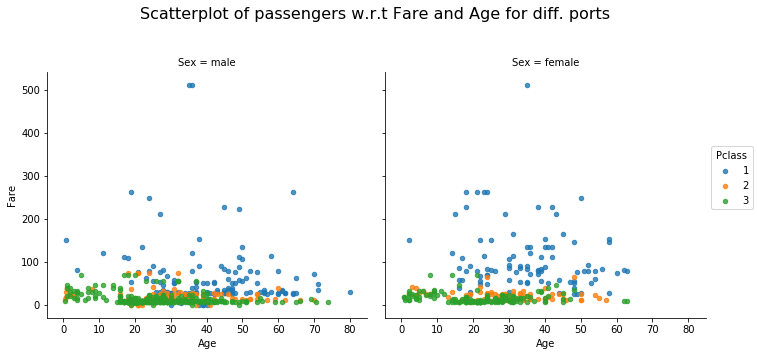

In [29]:
sns.lmplot('Age', 'Fare', data=df, fit_reg=False, hue="Pclass",col='Sex' ,scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.8)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

From above visualization we can see that Fare is quite uniform for Class 2 and 3 across all ages. Fare varies for Class 1 across all ages

# Conclusions

From my exploratory analysis of Titanic dataset we conclude that, women had higher chances of survival. We can do test to come up with probablity of survival. I also see that Class(Socio-Economic status) of the passengers had played a role in their survival. I also compared fare across different classes and found that it varied a lot for Class 1 passengers.

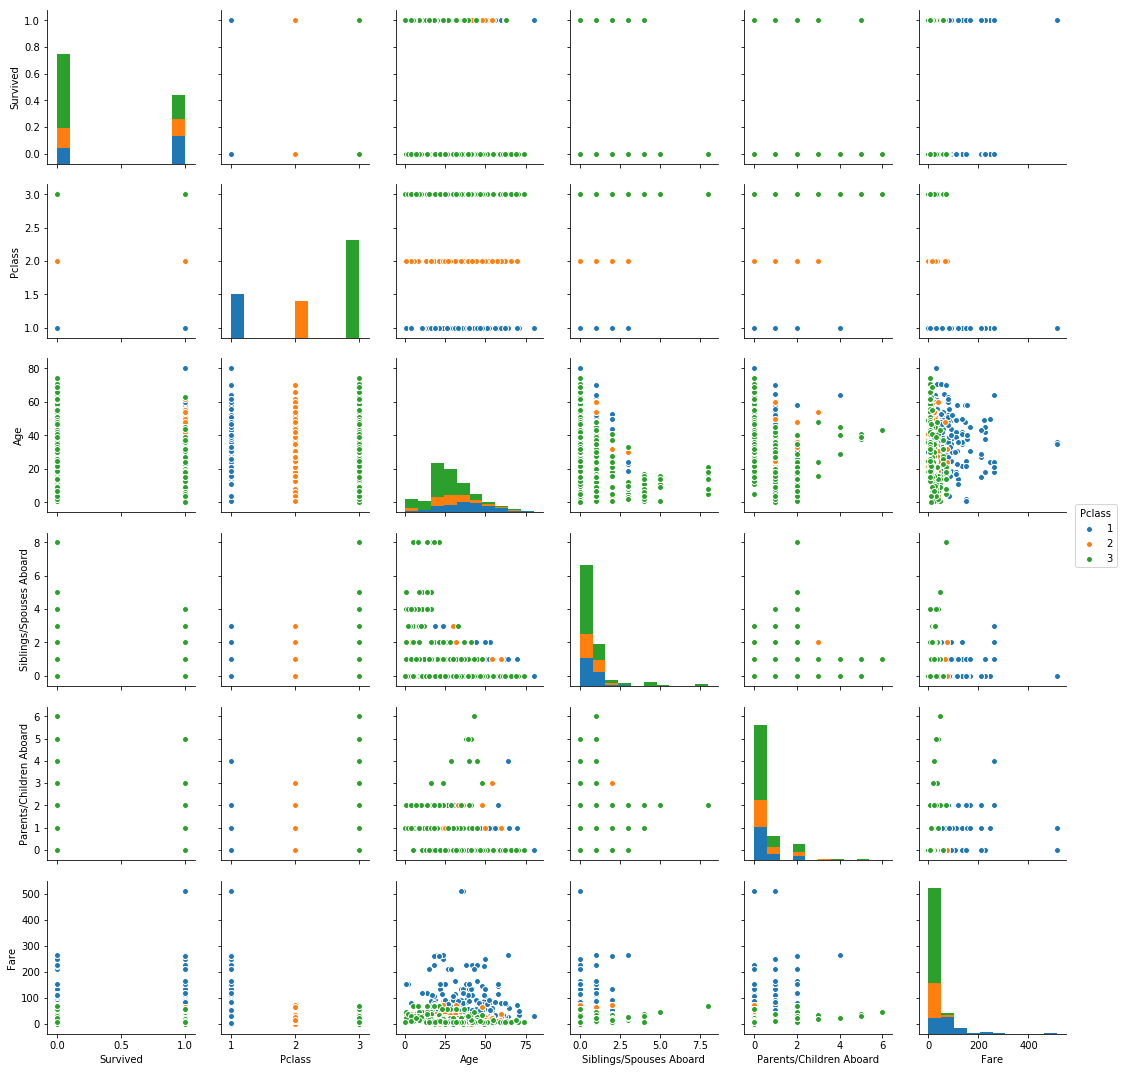

In [30]:
sns.pairplot(df, hue='Pclass')

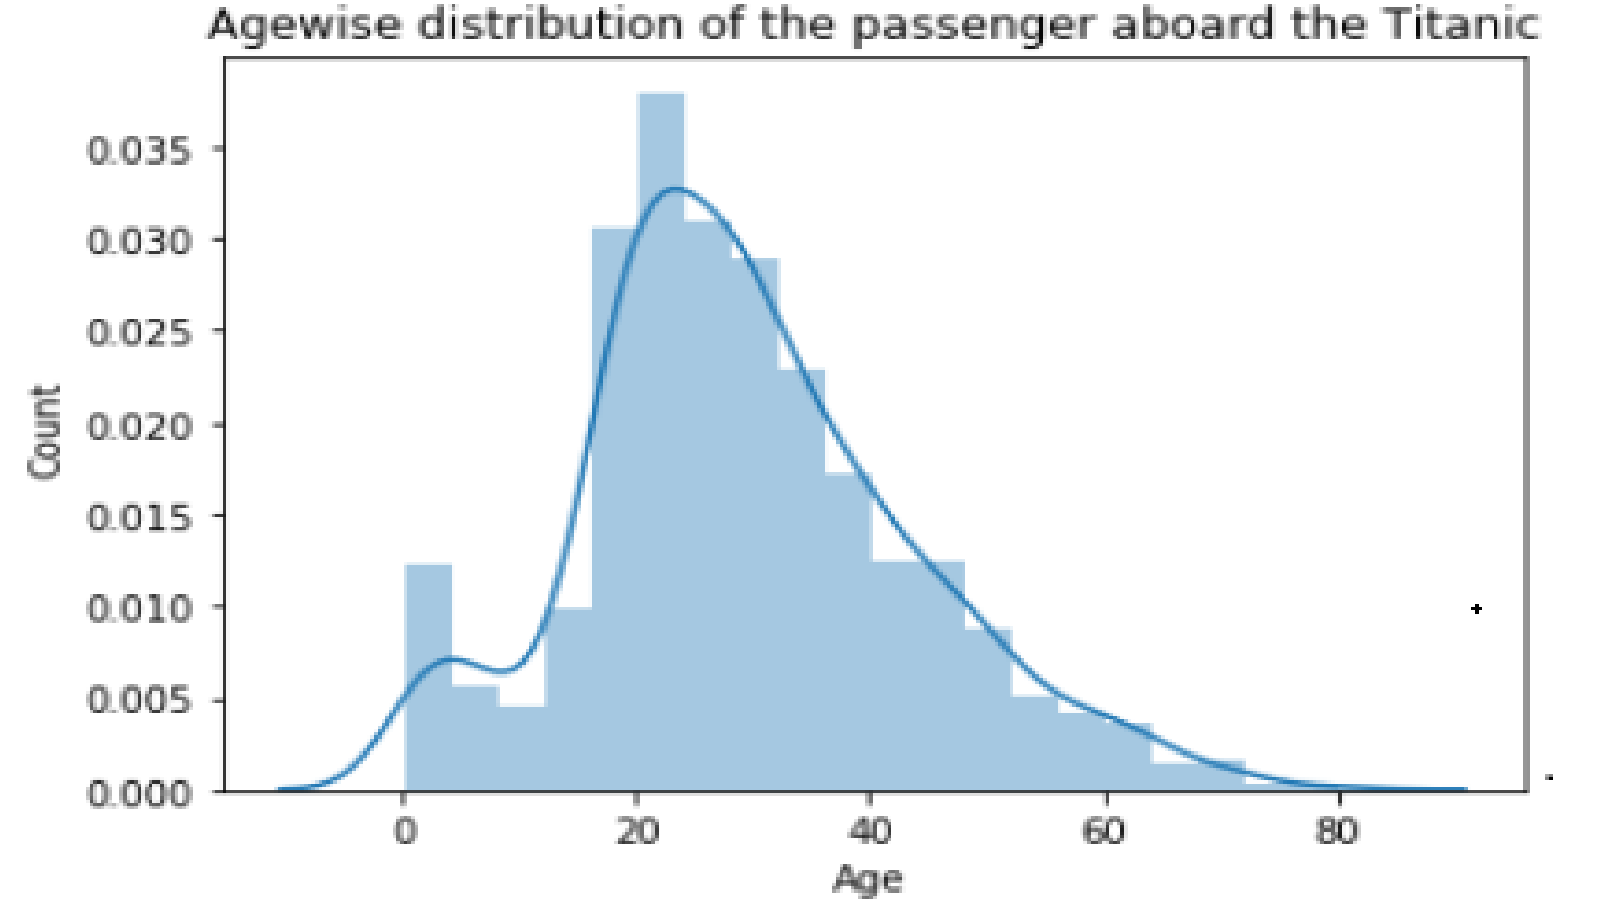

In [31]:
from IPython.display import Image
Image(filename='1.PNG')

Its quite interesting to know that mostly youngster were on the titanic as compared to seniors and children having age <10.
This shows that at that time also youngster were excited about travelling and planning trip away from home.
(Not knowing it will become their last trip)

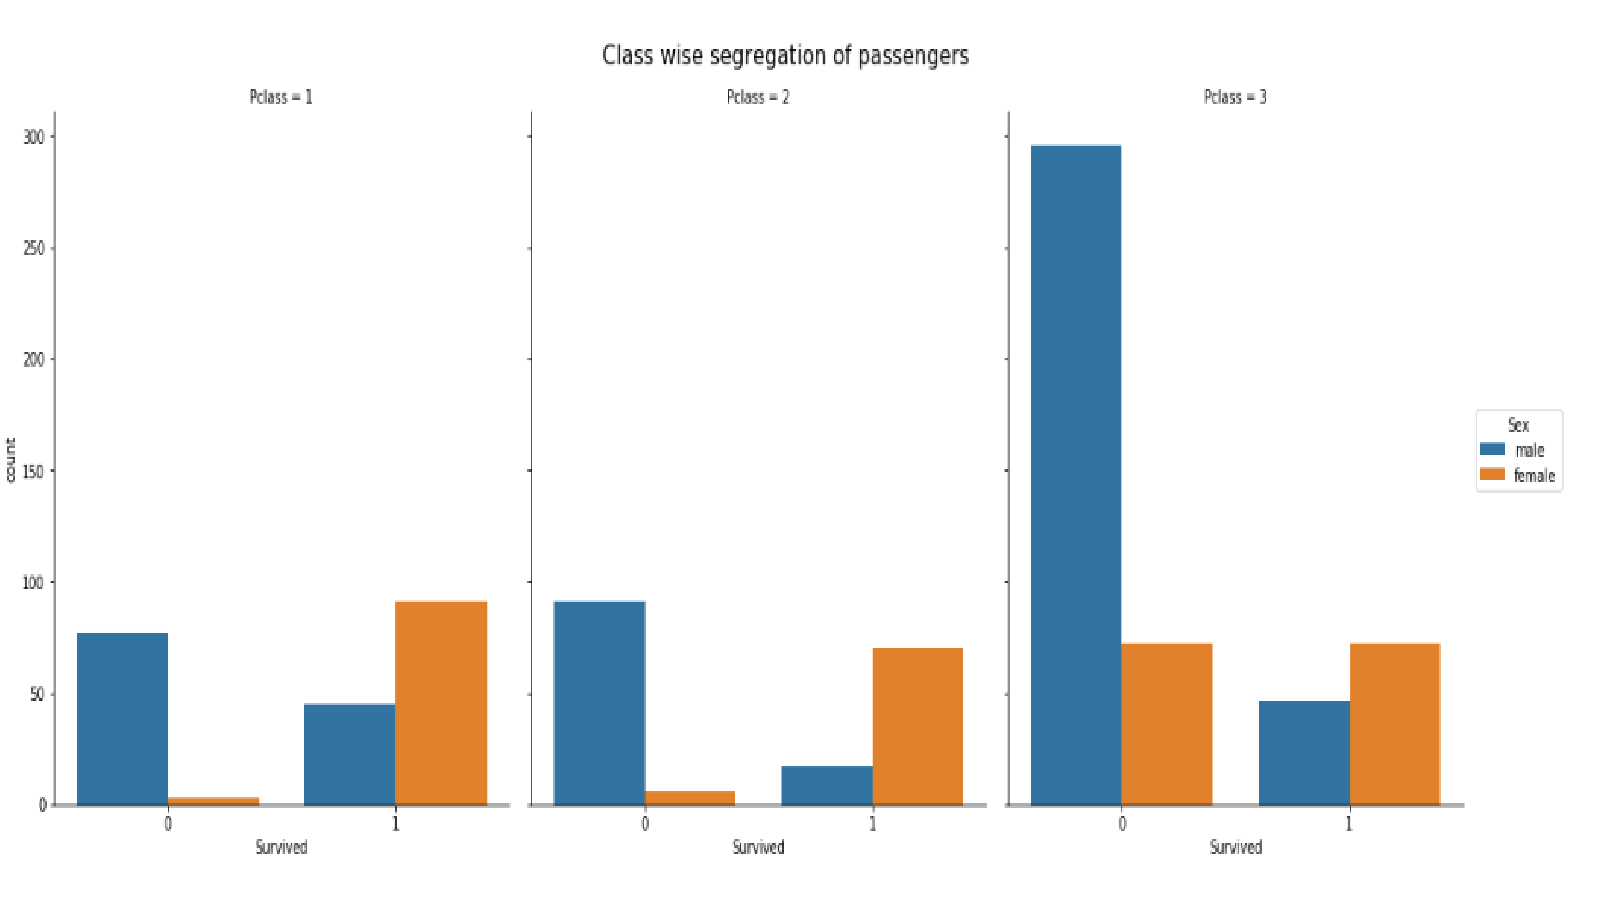

In [32]:
from IPython.display import Image
Image(filename='2.PNG')

Its shocking and amazing too to see that persons in class 1 survived more especially FEMALES...
Males survival rate is very less as compared to Females.
it means class 1 people surival rate overall is greater.